# AirBnB Data Analysis for Seattle

This notebook holds analysis of ***AirBnB Data of Seattle city for the year 2016-17***.<br> 
Analysis follows **`CRISP-DM`** process and is a part of *Udacity's Data Scientist Nanodegree program*<br>

This data is provided by *AirBnB* on **kaggle**, you can download the data from [here](https://www.kaggle.com/airbnb/seattle/data)<br>

`Steps in CRISP-DM process:`
- Business Understanding
- Data Understanding 
- Data Preparation 
- Modelling
- Evaluation
- Setting out (information to stakeholder)

This notebook contains all of the steps mentioned above. 

## **Business Understanding**

Based on the data overview, here are some points and questions related to business or real-world applications of how the data could be used:
1. **Prices Overview**
    - What is the minimum, maximum and average price of listing(property) across the city?
    - What is the average price for each listing given in dataset?
    - Average price for each accommodation type (number of persons that can be accommodated : accommodates)
    - What is the average price per month?
    - Prices depending on Neighbourhood, what is the impact of meighbourhood on prices?
2. **Listings count Overview**
    - Number of listings based on price
    - Number of listings based on number of reviews
    - Number of listings registered per month
    - Number of listings available per month
    - Number of listings which are not available per month
    - Number of listings based on accommodates type
3. **Find busiest time of the year for this city**
    - Get insights from listings count overview
4. **Occupancy rate and Number of reviews over time**
    - What is the occupancy rate over time(all year)
    - Number of reviews added over time
5. **Price Modelling**
    - Find out the features that have more influence on price. (basically find out important features)

#### ***Import all the required libraries***

In [1]:
#libraries and packages required for data analysis
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 50)    
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

import matplotlib.pyplot as plt
import seaborn as sns


#libraries and packages need for data modeling
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error

## **Data Understanding**

Following code cells are used to understand the data, extract important features and to clean the dataset<br>

#### ***Overview of listing.csv***

In [2]:
#read listing.csv, and its shape
listing_seattle = pd.read_csv('listings_seattle.csv')
print('Shape of listing csv is',listing_seattle.shape)

Shape of listing csv is (3818, 92)


In [3]:
#data overview
listing_seattle.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,NaN,NaN,NaN,NaN,https://a1.muscache.com/ac/pictures/67560560/c...,NaN,956883,https://www.airbnb.com/users/show/956883,Maija,2011-08-11,"Seattle, Washington, United States","I am an artist, interior designer, and run a s...",within a few hours,96%,100%,f,https://a0.muscache.com/ac/users/956883/profil...,https://a0.muscache.com/ac/users/956883/profil...,Queen Anne,3.0,3.0,"['email', 'phone', 'reviews', 'kba']",t,t,"Gilman Dr W, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.636289,-122.371025,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",NaN,$85.00,NaN,NaN,NaN,NaN,2,$5.00,1,365,4 weeks ago,t,14,41,71,346,2016-01-04,207,2011-11-01,2016-01-02,95.0,10.0,10.0,10.0,10.0,9.0,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",What's up with the free pillows? Our home was...,"Convenient bus stops are just down the block, ...",https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/im/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,5177328,https://www.airbnb.com/users/show/5177328,Andrea,2013-02-21,"Seattle, Washington, United States",Living east coast/left coast/overseas. Time i...,within an hour,98%,100%,t,https://a0.muscache.com/ac/users/5177328/profi...,https://a0.muscache.com/ac/users/5177328/profi...,Queen Anne,6.0,6.0,"['email', 'phone', 'facebook', 'linkedin', 're...",t,t,"7th Avenue West, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.639123,-122.365666,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",NaN,$150.00,"$1,000.00","$3,000.00",$100.00,$40.00,1,$0.00,2,90,today,t,13,13,16,291,2016-01-04,43,2013-08-19,2015-12-29,96.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazi

##### ***Basic checks and high level data analysis***

In [4]:
#description of all numeric features
listing_seattle.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds,square_feet,guests_included,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,reviews_per_month
count,3.818000e+03,3.818000e+03,3.818000e+03,3816.000000,3816.000000,3818.000000,3818.000000,3818.000000,3802.000000,3812.000000,3817.000000,97.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3171.000000,3160.000000,3165.000000,3160.000000,3167.000000,3163.000000,3162.000000,0.0,3818.000000,3191.000000
mean,5.550111e+06,2.016010e+13,1.578556e+07,7.157757,7.157757,47.628961,-122.333103,3.349398,1.259469,1.307712,1.735394,854.618557,1.672603,2.369303,780.447617,16.786276,36.814825,58.082504,244.772656,22.223415,94.539262,9.636392,9.556398,9.786709,9.809599,9.608916,9.452245,NaN,2.946307,2.078919
std,2.962660e+06,0.000000e+00,1.458382e+07,28.628149,28.628149,0.043052,0.031745,1.977599,0.590369,0.883395,1.139480,671.404893,1.311040,16.305902,1683.589007,12.173637,23.337541,34.063845,126.772526,37.730892,6.606083,0.698031,0.797274,0.595499,0.568211,0.629053,0.750259,NaN,5.893029,1.822348
min,3.335000e+03,2.016010e+13,4.193000e+03,1.000000,1.000000,47.505088,-122.417219,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,2.000000,3.000000,2.000000,2.000000,4.000000,2.000000,NaN,1.000000,0.020000
25%,3.258256e+06,2.016010e+13,3.275204e+06,1.000000,1.000000,47.609418,-122.354320,2.000000,1.000000,1.000000,1.000000,420.000000,1.000000,1.000000,60.000000,2.000000,13.000000,28.000000,124.000000,2.000000,93.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000,NaN,1.000000,0.695000
50%,6.118244e+06,2.016010e+13,1.055814e+07,1.000000,1.000000,47.623601,-122.328874,3.000000,1.000000,1.000000,1.000000,750.000000,1.000000,2.000000,1125.000000,20.000000,46.000000,73.000000,308.000000,9.000000,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,1.000000,1.540000
75%,8.035127e+06,2.016010e+13,2.590309e+07,3.000000,3.000000,47.662694,-122.310800,4.000000,1.000000,2.000000,2.000000,1200.000000,2.000000,2.000000,1125.000000,30.000000,59.000000,89.000000,360.000000,26.000000,99.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,2.000000,3.000000
max,1.034016e+07,2.016010e+13,5.320861e+07,502.000000,502.000000,47.733358,-122.240607,16.000000,8.000000,7.000000,15.000000,3000.000000,15.000000,1000.000000,100000.000000,30.000000,60.000000,90.000000,365.000000,474.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,37.000000,12.150000


In [5]:
#what are the columns
listing_seattle.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary', 'space', 'description', 'experiences_offered', 'neighborhood_overview', 'notes', 'transit', 'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since', 'host_location', 'host_about', 'host_response_time', 'host_response_rate', 'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood', 'host_listings_count', 'host_total_listings_count', 'host_verifications', 'host_has_profile_pic', 'host_identity_verified', 'street', 'neighbourhood', 'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market', 'smart_location', 'country_code', 'country', 'latitude', 'longitude', 'is_location_exact', 'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', 'square_feet', 'price', 'weekly_price', 'monthly_price', 'security_deposit',
       'cleanin

In [6]:
#are the ids unique for each row?
len(listing_seattle['id'].unique()) == len(listing_seattle)

True

In [7]:
#find number of hosts and listings
listing_count = len(listing_seattle['id'].unique())        #listing_seattle['id'].count() cnn also be used as each row contains information about unique listing
host_count = len(listing_seattle['host_id'].unique())
print(f'"listing_seattle.csv" contains information about {listing_count} listings(properties), hosted by {host_count} hosts')

"listing_seattle.csv" contains information about 3818 listings(properties), hosted by 2751 hosts


In [8]:
#number of missing values in each column
listing_seattle_missing = listing_seattle.isnull().sum()
listing_seattle_missing.sort_values(ascending=False)
#license column is not of any use, we can discard it!

license             3818
square_feet         3721
monthly_price       2301
security_deposit    1952
weekly_price        1809
                    ... 
accommodates           0
bed_type               0
amenities              0
price                  0
id                     0
Length: 92, dtype: int64

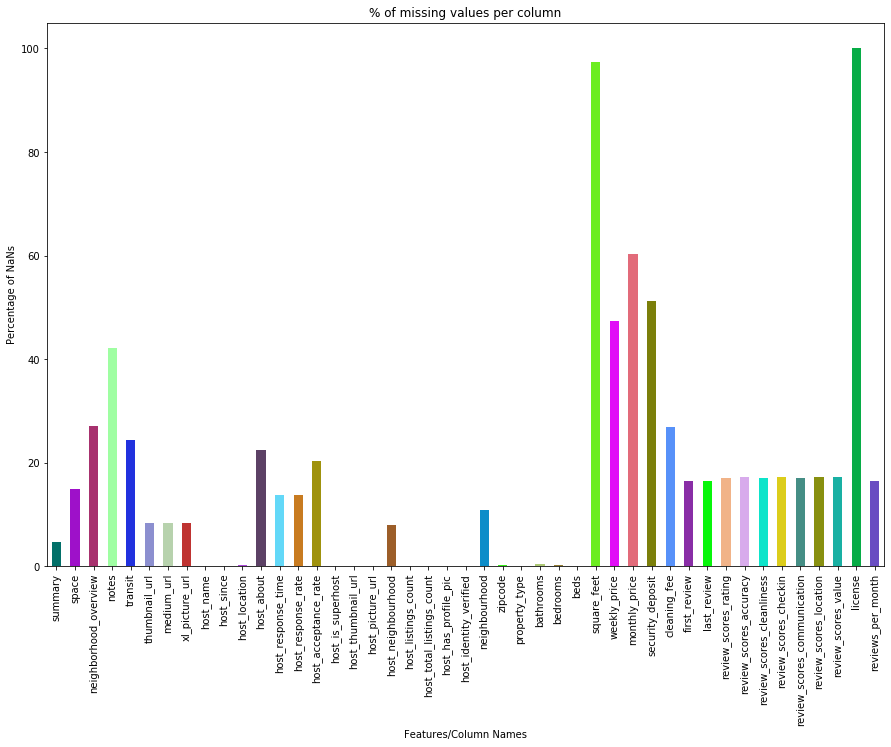

In [11]:
#percentage of missing values in each column
listing_seattle_mp = listing_seattle.isnull().mean()*100

#filter columns with missing values
listing_seattle_mp_with_nan = listing_seattle_mp[listing_seattle_mp>0]

#visualize result
plt.figure(figsize=(15,10))
listing_seattle_mp_with_nan.plot.bar(title=f'% of missing values per column', color=np.random.rand(len(listing_seattle_mp_with_nan),3))
plt.xlabel('Features/Column Names')
plt.ylabel('Percentage of NaNs')
plt.savefig('./visualizations/listings_percentage_of_MissingValues.png')
plt.show()

> This shows that some calumns like **'square_feet', 'license', and 'notes'** have **very less data** to play around and that might hurt our analysis, so it would be better to **`drop such columns`** which have very little information that could affect price or other data analysis.

#### ***Overview of calendar.csv***

In [12]:
#reading calendar.csv, and its shape
calendar_seattle = pd.read_csv('calendar_seattle.csv')
print(f"Shape of calendar csv is {calendar_seattle.shape}")

Shape of calendar csv is (1393570, 4)


##### ***Basic checks and high level data analysis of calendar.csv***

In [13]:
#looking at the data
calendar_seattle.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [14]:
calendar_seattle.dtypes

listing_id     int64
date          object
available     object
price         object
dtype: object

In [15]:
#number of rows(entries) for each listing_id
print(calendar_seattle['listing_id'].value_counts())

#check if any listing_id had less than 365 days of data
less_365 = sum(list(calendar_seattle['listing_id'].value_counts()<365))
print(f'Number of listings which have less than 365 rows {less_365}')

6752031     365
7404370     365
1259305     365
4672934     365
10310373    365
           ... 
9999759     365
9048029     365
8441477     365
7984550     365
9484823     365
Name: listing_id, Length: 3818, dtype: int64
Number of listings which have less than 365 rows 0


Are the number of listings in both datasets same?

In [16]:
#make sure your number of listings are same in calendar.csv and listings.csv
len(listing_seattle) == len(calendar_seattle)//365

True

In [17]:
#information
rows_num = calendar_seattle.shape[0]
print(f'Number of rows in calendar.csv are {rows_num}')

#find first and last day of the calendar
min_date = calendar_seattle['date'].min()
max_date = calendar_seattle['date'].max()
print(f'First date of observation is {min_date} and the last date is {max_date}')

Number of rows in calendar.csv are 1393570
First date of observation is 2016-01-04 and the last date is 2017-01-02


In [18]:
#number of missing values in each column
calendar_seattle_missing = calendar_seattle.isnull().sum()
max_nan_calendar = list(dict(calendar_seattle_missing.sort_values(ascending=False)).keys())[0]
max_nan_calendar_p = round(max(calendar_seattle.isnull().mean()*100))
print(f'Maximum number of NaNs are present in "{max_nan_calendar}" column, which is about {max_nan_calendar_p}%')

Maximum number of NaNs are present in "price" column, which is about 33%


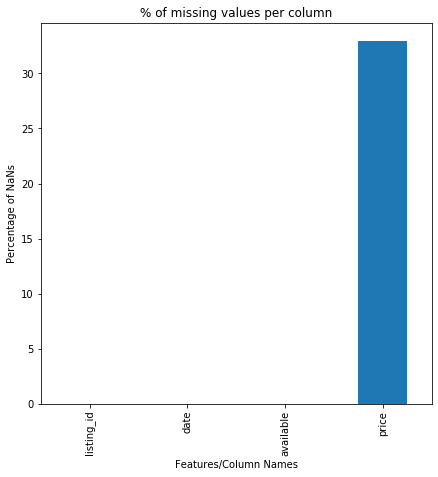

In [20]:
#percentage of missing values in each column
calendar_seattle_mp = calendar_seattle.isnull().mean()*100

#visualize result
plt.figure(figsize=(7,7))
calendar_seattle_mp.plot.bar(title='% of missing values per column')
plt.xlabel('Features/Column Names')
plt.ylabel('Percentage of NaNs')
plt.savefig('./visualizations/calendar_percantage_of_MissingValues.png')
plt.show()

>Thus there are only **33% of NaNs in price column**.<br>
That also indicates that, on an average only **33% of the listings were occupied** thoughout the year among all 365 days of all listings<br> 

## **Data Preparation**

#### **Merge** the listing and calendar csv, and **Clean** the final dataframe

In [21]:
#rename the 'id' column in listing.csv to 'listing_id'
listing_seattle = listing_seattle.rename(index=str, columns = {'id':'listing_id'})

In [22]:
#now we can merge our datasets based on listing_id
df = pd.merge(calendar_seattle, listing_seattle, on='listing_id')

In [23]:
#analysing all the columns to decide between with all are relevent and which are irrelevent
df.head()

,listing_id,date,available,price_x,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price_y,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,2016-01-04,t,$85.00,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,NaN,NaN,NaN,NaN,https://a1.muscache.com/ac/pictures/67560560/c...,NaN,956883,https://www.airbnb.com/users/show/956883,Maija,2011-08-11,"Seattle, Washington, United States","I am an artist, interior designer, and run a s...",within a few hours,96%,100%,f,https://a0.muscache.com/ac/users/956883/profil...,https://a0.muscache.com/ac/users/956883/profil...,Queen Anne,3.0,3.0,"['email', 'phone', 'reviews', 'kba']",t,t,"Gilman Dr W, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.636289,-122.371025,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",NaN,$85.00,NaN,NaN,NaN,NaN,2,$5.00,1,365,4 weeks ago,t,14,41,71,346,2016-01-04,207,2011-11-01,2016-01-02,95.0,10.0,10.0,10.0,10.0,9.0,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,241032,2016-01-05,t,$85.00,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,NaN,NaN,NaN,NaN,https://a1.muscache.com/ac/pictures/67560560/c...,NaN,956883,https://www.airbnb.com/users/show/956883,Maija,2011-08-11,"Seattle, Washington, United States","I am an artist, interior designer, and run a s...",within a few hours,96%,100%,f,https://a0.muscache.com/ac/users/956883/profil...,https://a0.muscache.com/ac/users/956883/profil...,Queen Anne,3.0,3.0,"['email', 'phone', 'reviews', 'kba']",t,t,"Gilman Dr W, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.636289,-122.371025,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",NaN,$85.00,NaN,NaN,NaN,NaN,2,$5.00,1,365,4 weeks ago,t,14,41,71,346,2016-01-04,207,2011-11-01,2016-01-02,95.0,10.0,10.0,10.0,10.0,9.0,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
2,241032,2016-01-06,f,NaN,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,NaN,NaN,NaN,NaN,https://a1.muscache.com/ac/pictures/67560560/c...,NaN,956883,https://www.airbnb.com/users/show/956883,Maija,2011-08-11,"Seattle, Washin

In [24]:
df.describe()

,listing_id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds,square_feet,guests_included,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,reviews_per_month
count,1.393570e+06,1.393570e+06,1.393570e+06,1.392840e+06,1.392840e+06,1.393570e+06,1.393570e+06,1.393570e+06,1.387730e+06,1.391380e+06,1.393205e+06,35405.000000,1.393570e+06,1.393570e+06,1.393570e+06,1.393570e+06,1.393570e+06,1.393570e+06,1.393570e+06,1.393570e+06,1.157415e+06,1.153400e+06,1.155225e+06,1.153400e+06,1.155955e+06,1.154495e+06,1.154130e+06,0.0,1.393570e+06,1.164715e+06
mean,5.550111e+06,2.016010e+13,1.578556e+07,7.157757e+00,7.157757e+00,4.762896e+01,-1.223331e+02,3.349398e+00,1.259469e+00,1.307712e+00,1.735394e+00,854.618557,1.672603e+00,2.369303e+00,7.804476e+02,1.678628e+01,3.681482e+01,5.808250e+01,2.447727e+02,2.222342e+01,9.453926e+01,9.636392e+00,9.556398e+00,9.786709e+00,9.809599e+00,9.608916e+00,9.452245e+00,NaN,2.946307e+00,2.078919e+00
std,2.962274e+06,5.650744e+02,1.458191e+07,2.862441e+01,2.862441e+01,4.304633e-02,3.174036e-02,1.977341e+00,5.902917e-01,8.832794e-01,1.139331e+00,667.944510,1.310868e+00,1.630377e+01,1.683369e+03,1.217205e+01,2.333449e+01,3.405940e+01,1.267560e+02,3.772596e+01,6.605044e+00,6.979210e-01,7.971483e-01,5.954051e-01,5.681220e-01,6.289541e-01,7.501403e-01,NaN,5.892260e+00,1.822063e+00
min,3.335000e+03,2.016010e+13,4.193000e+03,1.000000e+00,1.000000e+00,4.750509e+01,-1.224172e+02,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+01,2.000000e+00,3.000000e+00,2.000000e+00,2.000000e+00,4.000000e+00,2.000000e+00,NaN,1.000000e+00,2.000000e-02
25%,3.258213e+06,2.016010e+13,3.271389e+06,1.000000e+00,1.000000e+00,4.760942e+01,-1.223543e+02,2.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,420.000000,1.000000e+00,1.000000e+00,6.000000e+01,2.000000e+00,1.300000e+01,2.800000e+01,1.240000e+02,2.000000e+00,9.300000e+01,9.000000e+00,9.000000e+00,1.000000e+01,1.000000e+01,9.000000e+00,9.000000e+00,NaN,1.000000e+00,6.900000e-01
50%,6.118244e+06,2.016010e+13,1.055814e+07,1.000000e+00,1.000000e+00,4.762360e+01,-1.223289e+02,3.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,750.000000,1.000000e+00,2.000000e+00,1.125000e+03,2.000000e+01,4.600000e+01,7.300000e+01,3.080000e+02,9.000000e+00,9.600000e+01,1.000000e+01,1.000000e+01,1.000000e+01,1.000000e+01,1.000000e+01,1.000000e+01,NaN,1.000000e+00,1.540000e+00
75%,8.035212e+06,2.016010e+13,2.590413e+07,3.000000e+00,3.000000e+00,4.766270e+01,-1.223108e+02,4.000000e+00,1.000000e+00,2.000000e+00,2.000000e+00,1200.000000,2.000000e+00,2.000000e+00,1.125000e+03,3.000000e+01,5.900000e+01,8.900000e+01,3.600000e+02,2.600000e+01,9.900000e+01,1.000000e+01,1.000000e+01,1.000000e+01,1.000000e+01,1.000000e+01,1.000000e+01,NaN,2.000000e+00,3.000000e+00
max,1.034016e+07,2.016010e+13,5.320861e+07,5.020000e+02,5.020000e+02,4.773336e+01,-1.222406e+02,1.600000e+01,8.000000e+00,7.000000e+00,1.500000e+01,3000.000000,1.500000e+01,1.000000e+03,1.000000e+05,3.000000e+01,6.000000e+01,9.000000e+01,3.650000e+02,4.740000e+02,1.000000e+02,1.000000e+01,1.000000e+01,1.000000e+01,1.000000e+01,1.000000e+01,1.000000e+01,NaN,3.700000e+01,1.215000e+01


##### Let us now **drop redundant information** from our dataset, thes columns are `irrelevent for our analysis`, hence **dropping** them makes our task easy.

In [25]:
#irrelevent columns, these are the columns which are not so informative for out analysis
columns_to_drop = ['host_id','host_location','host_acceptance_rate','host_neighbourhood',
                   'host_total_listings_count', 'weekly_price', 'monthly_price',
                   'security_deposit', 'cleaning_fee', 'calendar_updated',
                   'listing_url','last_scraped' ,'scrape_id', 'name', 'summary', 'space', 'description',
                   'experiences_offered', 'street', 'neighbourhood', 'neighbourhood_cleansed', 'zipcode',
                   'neighborhood_overview', 'notes', 'transit', 'thumbnail_url', 'medium_url', 'picture_url',
                   'xl_picture_url', 'host_url', 'host_name', 'host_about', 'host_thumbnail_url', 'host_picture_url',
                   'city', 'state', 'market', 'smart_location', 'country_code', 'country', 'latitude', 'longitude',
                   'is_location_exact', 'square_feet', 'has_availability', 'availability_30',
                   'availability_60', 'availability_90', 'availability_365', 'calendar_last_scraped',
                  'first_review', 'last_review', 'requires_license', 'license', 'jurisdiction_names', 'price_y',
                  'reviews_per_month']

In [26]:
#drop irrelevent columns
df = df.drop(columns=columns_to_drop)

In [27]:
df.columns

Index(['listing_id', 'date', 'available', 'price_x', 'host_since', 'host_response_time', 'host_response_rate', 'host_is_superhost', 'host_listings_count', 'host_verifications', 'host_has_profile_pic', 'host_identity_verified', 'neighbourhood_group_cleansed', 'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', 'guests_included', 'extra_people', 'minimum_nights', 'maximum_nights', 'number_of_reviews', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 'instant_bookable', 'cancellation_policy', 'require_guest_profile_picture', 'require_guest_phone_verification', 'calculated_host_listings_count'], dtype='object')

##### ***What is the type of each variable in raw data***

In [28]:
#check dtypes 
df.dtypes

listing_id                            int64
date                                 object
available                            object
price_x                              object
host_since                           object
host_response_time                   object
host_response_rate                   object
host_is_superhost                    object
host_listings_count                 float64
host_verifications                   object
host_has_profile_pic                 object
host_identity_verified               object
neighbourhood_group_cleansed         object
property_type                        object
room_type                            object
accommodates                          int64
bathrooms                           float64
bedrooms                            float64
beds                                float64
bed_type                             object
amenities                            object
guests_included                       int64
extra_people                    

##### ***Convert price to number***

In [29]:
#convert price to number and drop the price_x column
df['price'] = df['price_x'].str.replace('[$, ]', '').astype(float)
df = df.drop(columns=['price_x'])

In [30]:
#unit test checking for above operation
df['price'].dtype

dtype('float64')

##### ***Convert date from string to numbers/readable date format***

In [31]:
#converting date from the calendar into month 
df['month'] = df.apply(lambda row: int(row['date'].split('-')[1]),axis=1)

In [32]:
#converting date from the calendar into year and drop the date column
df['year'] = df.apply(lambda row: int(row['date'].split('-')[0]), axis=1)

In [33]:
df = df.drop(columns= ['date'])

##### ***Convert other columns to numbers for our relevance in data analysis and modelling***

In [34]:
#convert host_since date into number and fill in missing values, drop the original column

def get_year_for_host_since(row):
    """
    Takes in a row of dataframe.
    Returns row with modified value of 'host_since' as its year only.
    """
    try:
        host_since = int(row['host_since'].split('-')[0])
    except:
        host_since = np.NaN
    return host_since

df['host_since_year'] = df.apply(lambda row: get_year_for_host_since(row),axis=1)
df = df.drop(columns = ['host_since'])

In [35]:
#Number of nans in 'host since year'
df['host_since_year'].isnull().sum()

730

Now, let us fill all the missing values in our data, this is necessary for any model to fit our data.

In [36]:
#convert host_response_rate into number and fill in missing values, drop the original column
df['host_response_rate_num'] = df['host_response_rate'].str.replace('%','').astype(float)
df = df.drop(columns = ['host_response_rate'])

In [43]:
#description of this new host_response_rate_num column
df['host_response_rate_num'].describe().apply(lambda x: format(x, 'f'))

count    1202675.000000
mean          94.886798
std           11.864909
min           17.000000
25%           98.000000
50%          100.000000
75%          100.000000
max          100.000000
Name: host_response_rate_num, dtype: object

In [45]:
#percentage of missing data in this column
df['host_response_rate_num'].isnull().sum() / len(df) *100 

13.698271346254584

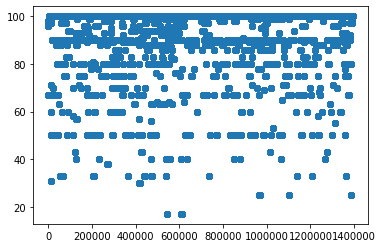

In [44]:
#scatter plot to see the variation in data
plt.scatter(range(len(df)),df['host_response_rate_num'])

> From the above scatter plot we can see that majority of values in this column lie in the range of 80-98, 98 being the max value. As 94 is the mean as also lie in this range, we must impute mean at missing values which are 13% of the total.  

In [33]:
#fill missing values with mean.
df['host_response_rate_num'] = df['host_response_rate_num'].fillna(df['host_response_rate_num'].mean())

Split host_response_rate_num into buckets as the datapoints corresponding to this feature are scattered with few outliers too, also these data points are spreaded with standard deviation of 11 which means high variation. Thus splitting into two buckets irradicates weightage problem.

In [46]:
#splitting the host_response_rate_num into 2 buckets with new classes for further modeling and to avoid weightage problem
df['host_response_rate_buckets'] = pd.qcut(df['host_response_rate_num'], 5, labels=False, duplicates = 'drop')

In [47]:
df = df.drop(columns = ['host_response_rate_num'])
df['host_response_rate_buckets'].value_counts()

1.0    956665
0.0    246010
Name: host_response_rate_buckets, dtype: int64

In [52]:
#analyzing host_listing_count
df['host_listings_count'].isnull().sum() / len(df) *100
#thus only 5% of this data is missing

0.05238344683080147

In [50]:
df['host_listings_count'].describe().apply(lambda x: format(x, 'f'))

count    1392840.000000
mean           7.157757
std           28.624408
min            1.000000
25%            1.000000
50%            1.000000
75%            3.000000
max          502.000000
Name: host_listings_count, dtype: object

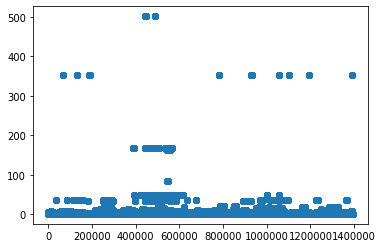

In [49]:
plt.scatter(range(len(df)),df['host_listings_count'])

As it can be seen that most all the data points fall in 0-40 range, filling the missing data with mean = 7, and maximum of data points are below 20, hence filling the missing data with mean is a good option as compared to others to ***maintain the variability in the data***.

In [37]:
#fill missing values with mean value for host_listings_count
df['host_listings_count'].fillna(df['host_listings_count'].mean(), inplace = True)

In [57]:
#analyzing bathrooms, bedrooms and beds
df['bathrooms'].describe().apply(lambda x: format(x, 'f'))

count    1387730.000000
mean           1.259469
std            0.590292
min            0.000000
25%            1.000000
50%            1.000000
75%            1.000000
max            8.000000
Name: bathrooms, dtype: object

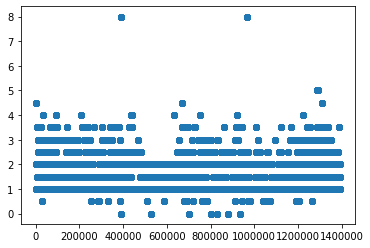

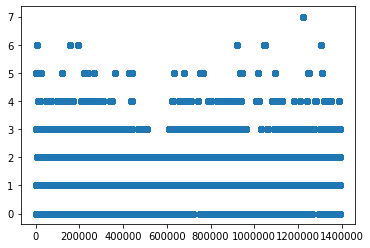

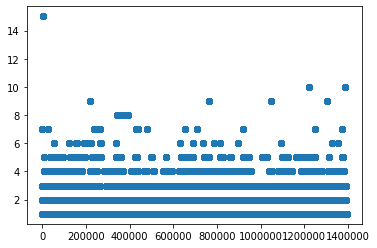

In [56]:
plt.scatter(range(len(df)),df['bathrooms'])
plt.show()

plt.scatter(range(len(df)),df['bedrooms'])
plt.show()

plt.scatter(range(len(df)),df['beds'])
plt.show()

For "bedrooms", "bathrooms" and "beds", it can be noted that values are **descrete and highly variable** in a very **small range** of number like 0-5 for bathrooms, 0-7 for bedrooms, 0-10 fo beds. Hence imputing a **mean will disturb the data variation** and add absurt numbers wheareas the decrete integers are expected. Also, we can notice **outliers** in the data hence, **imputing median would be a bad choice**. Hence imputing mode (maximum number of data points) is the best criteria for filling missing values, this will also maintain the variability.

In [38]:
#fill in missing values for bathrooms, bedrooms and beds with mode as mean wont be a good filling criteria here
df['bathrooms'] = df['bathrooms'].fillna(df['bathrooms'].mode()[0])
df['bedrooms'] = df['bedrooms'].fillna(df['bedrooms'].mode()[0])
df['beds'] = df['beds'].fillna(df['beds'].mode()[0])

In [39]:
#dummy variables for 'amenities'
df.amenities[0].replace('"','').replace("'",'').replace('{','').replace('}','').replace('[','').replace(']','').split(',')

['TV',
 'Cable TV',
 'Internet',
 'Wireless Internet',
 'Air Conditioning',
 'Kitchen',
 'Heating',
 'Family/Kid Friendly',
 'Washer',
 'Dryer']

##### ***Creation of dummy numeric variables (columns)*** from columns like ***`amenities`*** and ***`host_verification`*** which are stored in the form of list

In [40]:
def get_val_from_list(row, column_name, value):
    ''' Fill in dummy column for values '''
    val = 0.0
    try:
        vals = row[column_name].replace('[', '').replace("'", '').replace("]", '').replace('"', '').replace('{', '').replace('}', '').split(',')
        if value in vals:
            val = 1.0
    except:
        val = 0.0
    return val

def split_list_into_columns(df, column_name, max_dummies_num = 10):
    ''' Split values in columns, which contain lists (for example, amenities, host_verifications, etc) '''
    
    # get dictionary of unique values in lists across dataset rows
    values_dict = {}

    for unique_value in df[column_name].unique(): 
        for value in unique_value.replace('[', '').replace("'", '').replace("]", '').replace('"', '').replace('{', '').replace('}', '').split(','):
            if value in values_dict:
                values_dict[value] = values_dict[value] + 1
            else:
                values_dict[value] = 0
                
    values_sorted = sorted(values_dict.items(), key=lambda kv: kv[1], reverse = True)
      
    # split into columns
    for value in values_sorted[: max_dummies_num]:
        df[column_name + '_' + value[0]] = df.apply(lambda row: get_val_from_list(row, column_name, value[0]),axis=1)
        
    return

In [41]:
#split host_verifications and amenities into dummy columns and drop the original columns
split_list_into_columns(df, 'amenities')
split_list_into_columns(df, 'host_verifications')

df = df.drop(columns = ['host_verifications', 'amenities'])

##### Create ***`binary variable`*** to know if the listing charge for extra people

In [42]:
#extra_people into binary column for modeling(1 if there is extra fee, else 0)
df['extra_people_fee'] = df.apply(lambda row: 0.0 if row['extra_people']=='$0.00' else 1.0, axis=1)

In [43]:
#drop 'extra_people' column
df = df.drop(columns = ['extra_people'])
df = df.drop(columns = ['host_since_year'])

##### ***`Fill missing values`*** in columns related to reviews with their respective `mean`.

In [44]:
#fill missing values for review scores columns
review_scores_columns = ['review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness',
                     'review_scores_checkin', 'review_scores_communication', 'review_scores_location',
                     'review_scores_value']
for column in review_scores_columns:
    df[column].fillna(df[column].mean(), inplace = True)

##### Overview of ***cleaned & prepared dataset***

In [45]:
df.head()

,listing_id,available,host_response_time,host_is_superhost,host_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood_group_cleansed,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,guests_included,minimum_nights,maximum_nights,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,price,month,year,host_response_rate_buckets,amenities_Wireless Internet,amenities_Heating,amenities_Kitchen,amenities_Smoke Detector,amenities_Essentials,amenities_Dryer,amenities_Washer,amenities_Internet,amenities_Shampoo,amenities_TV,host_verifications_email,host_verifications_ phone,host_verifications_ reviews,host_verifications_ facebook,host_verifications_ jumio,host_verifications_ kba,host_verifications_ linkedin,host_verifications_ google,host_verifications_ manual_offline,host_verifications_phone,extra_people_fee
0,241032,t,within a few hours,f,3.0,t,t,Queen Anne,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,2,1,365,207,95.0,10.0,10.0,10.0,10.0,9.0,10.0,f,moderate,f,f,2,85.0,1,2016,1,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,241032,t,within a few hours,f,3.0,t,t,Queen Anne,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,2,1,365,207,95.0,10.0,10.0,10.0,10.0,9.0,10.0,f,moderate,f,f,2,85.0,1,2016,1,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,241032,f,within a few hours,f,3.0,t,t,Queen Anne,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,2,1,365,207,95.0,10.0,10.0,10.0,10.0,9.0,10.0,f,moderate,f,f,2,NaN,1,2016,1,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,241032,f,within a few hours,f,3.0,t,t,Queen Anne,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,2,1,365,207,95.0,10.0,10.0,10.0,10.0,9.0,10.0,f,moderate,f,f,2,NaN,1,2016,1,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,241032,f,within a few hours,f,3.0,t,t,Queen Anne,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,2,1,365,207,95.0,10.0,10.0,10.0,10.0,9.0,10.0,f,moderate,f,f,2,NaN,1,2016,1,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


## **Insights and Analysis over final dataset**

##### ***What is the `minimum`, `maximum` and `average price` of listing(property) across the city?***

In [46]:
#find minimum, maximum and average price for listing
min_price = df['price'].min()
max_price = df['price'].max()
mean_price = df['price'].mean()

print(f'Minimum price per listing is ${min_price}')
print(f'Maximum price per listing is ${max_price}')
print(f'Average price per listing is ${mean_price}')

Minimum price per listing is $10.0
Maximum price per listing is $1650.0
Average price per listing is $137.94485855103355


In [47]:
df[df['listing_id'] == 241032]['price'].mean()

85.0

##### ***What is the `average price` for each listing given in dataset?***

In [48]:
#get the average price for each listing
mean_price_for_listing = df.groupby('listing_id').mean()['price']

/home/nilesh/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/nilesh/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


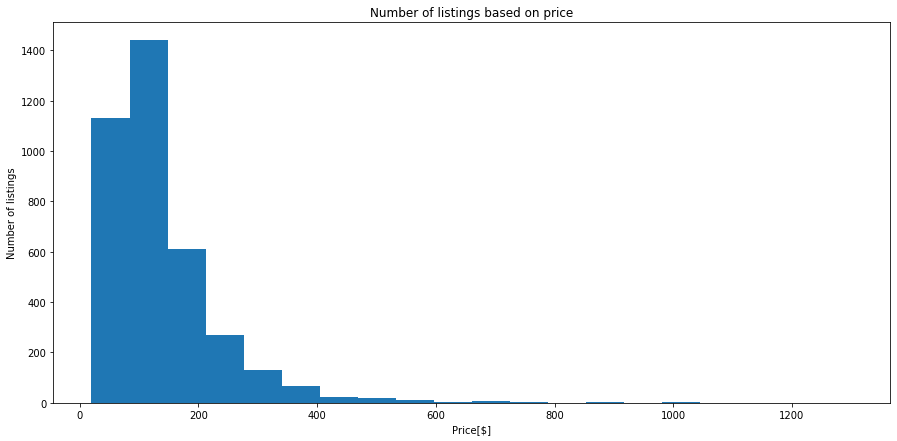

In [49]:
plt.figure(figsize=(15,7))
plt.hist(mean_price_for_listing, bins=20)
plt.ylabel('Number of listings')
plt.xlabel('Price[$]')
plt.title('Number of listings based on price')
plt.savefig('./vizualizations/Price_distrubution.png')
plt.show()

> From the above histogram we can conclude that, the `majority of listings are concentrated around $50-150`

##### ***What are the average number of reviews posted for each listing?***

In [50]:
#get the average number of reviews per listing
avg_num_reviews = df.groupby('listing_id').mean()['number_of_reviews']

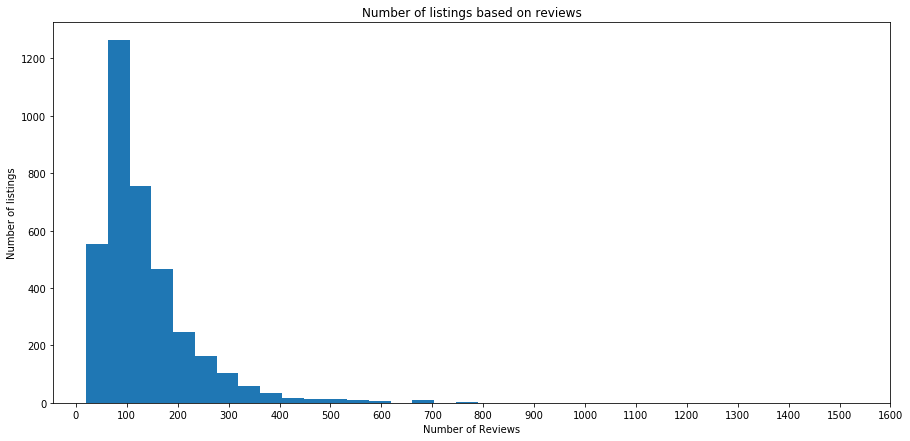

In [51]:
plt.figure(figsize=(15,7))
plt.hist(mean_price_for_listing, bins=30)
plt.xticks(np.arange(0, 1700, step=100))
plt.ylabel('Number of listings')
plt.xlabel('Number of Reviews')
plt.title('Number of listings based on reviews')
plt.savefig('./vizualizations/Reviews_distrubution.png')
plt.show()

> The majority of listings are ***`concentrated around 10-180 reviews`***

##### ***How many listings are registered `per month`?***

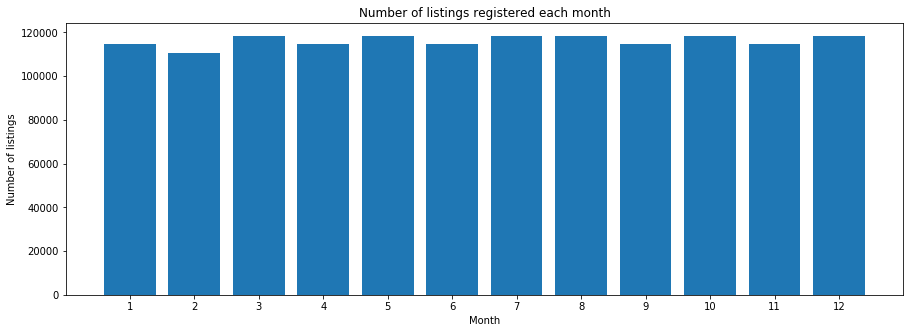

In [52]:
#get number of registered listings, irrespective of available or unavailable for each month
grouped_month = df.groupby(['month'])
num__listing_per_month = [len(grouped_month.get_group(i)['listing_id']) for i in range(1,13)]

plt.figure(figsize=(15,5))
plt.bar(np.arange(1,13,step=1), num__listing_per_month)   #color=np.random.rand(12,3)
plt.xticks(np.arange(1,13,step=1))
plt.title('Number of listings registered each month')
plt.xlabel('Month')
plt.ylabel('Number of listings')
plt.savefig('./vizualizations/Number of listings registered each month.png')
plt.show()

> We can see the trend of number of listings that are registered every month. It can be seen that the number of listings are low in *february, march, april, august, and novenmber* as these months see `surge in number of visitors`.

##### ***How many listings were `available` and `not available` for each month?***

In [53]:
#get number of available and not available listings per month 
num_listing_per_month = df.groupby(['month','available'])['listing_id'].unique()

In [54]:
num_listings_available_per_month = [len(num_listing_per_month[i]['t']) for i in range(1,13)]
num_listings_not_available_per_month = [len(num_listing_per_month[i]['f']) for i in range(1,13)]

In [55]:
num_listings_available_per_month, num_listings_not_available_per_month

([3623, 2895, 2950, 3002, 2705, 2720, 2503, 2561, 2649, 2694, 2771, 2866],
 [3007, 1933, 1573, 1652, 1525, 1520, 1665, 1523, 1365, 1216, 1141, 1060])

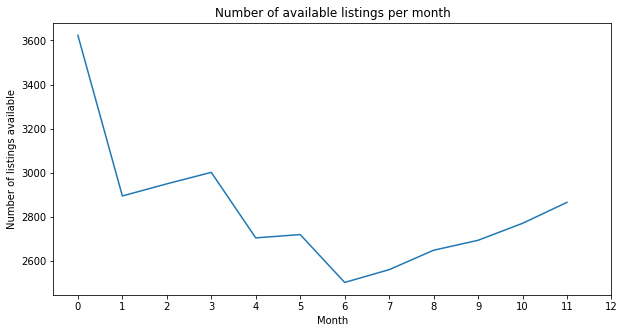

In [57]:
plt.figure(figsize=(10,5))
plt.plot(num_listings_available_per_month)
plt.xticks(np.arange(0, 13, step=1))
plt.ylabel('Number of listings available')
plt.xlabel('Month')
plt.title('Number of available listings per month')
plt.savefig('./vizualizations/number of available listings.png')
plt.show()

> This shows that the number of available properties are lowest in summer, which means that the summer is the busiest time and most of the properties are occupied!

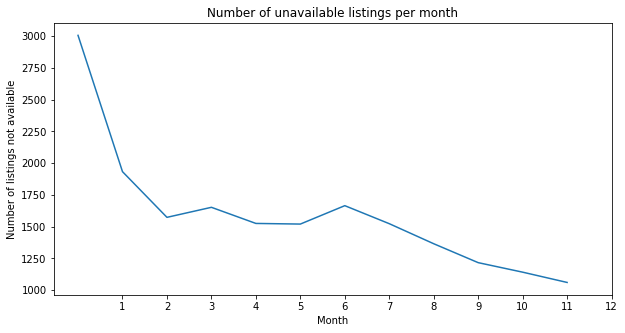

In [58]:
plt.figure(figsize=(10,5))
plt.plot(num_listings_not_available_per_month)
plt.xticks(np.arange(1, 13, step=1))
plt.ylabel('Number of listings not available')
plt.xlabel('Month')
plt.title('Number of unavailable listings per month')
plt.savefig('./vizualizations/number of listings not available.png')
plt.show()

> This again shows that, summer and year end are the busiest time of the year as number of unavailable listings are low in this time

##### ***What is the `average price` per month?***

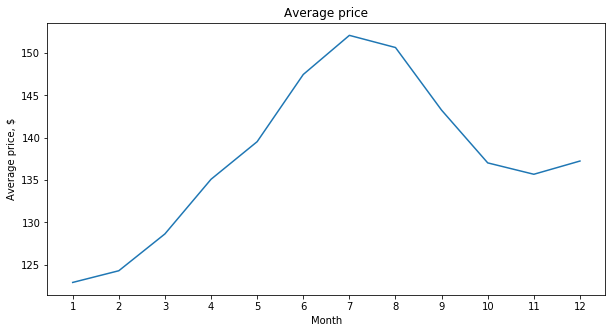

In [59]:
#find average price per month
average_price_by_month = df.groupby(['month'])['price'].mean()

#plot
plt.figure(figsize=(10,5))
plt.plot(average_price_by_month)
plt.xticks(np.arange(1, 13, step=1))
plt.ylabel('Average price, $')
plt.xlabel('Month')
plt.title('Average price')
plt.savefig('./vizualizations/average price for month.png')
plt.show()

> According to the diagram above listing prices **raise significantly in summer**, probably, because of the fact that there are ***less listings available for reservation***. There is also a ***raise in December***. This tells us that ***`summer and winter holidays`*** should be the ***`busiest times`*** to visit Seattle.

##### ***`Prices` Depending on `Neighbourhood`***
Neighbourhood might have great influence on the listing price. Let's take a look at listing prices depending on neighbourhood.

In [60]:
df['neighbourhood_group_cleansed'].value_counts()

Other neighborhoods    289810
Capitol Hill           206955
Downtown               193450
Central Area           134685
Queen Anne             107675
Ballard                 83950
West Seattle            74095
Rainier Valley          58035
University District     44530
Beacon Hill             43070
Cascade                 32485
Northgate               29200
Delridge                28835
Lake City               24455
Magnolia                22265
Seward Park             16060
Interbay                 4015
Name: neighbourhood_group_cleansed, dtype: int64

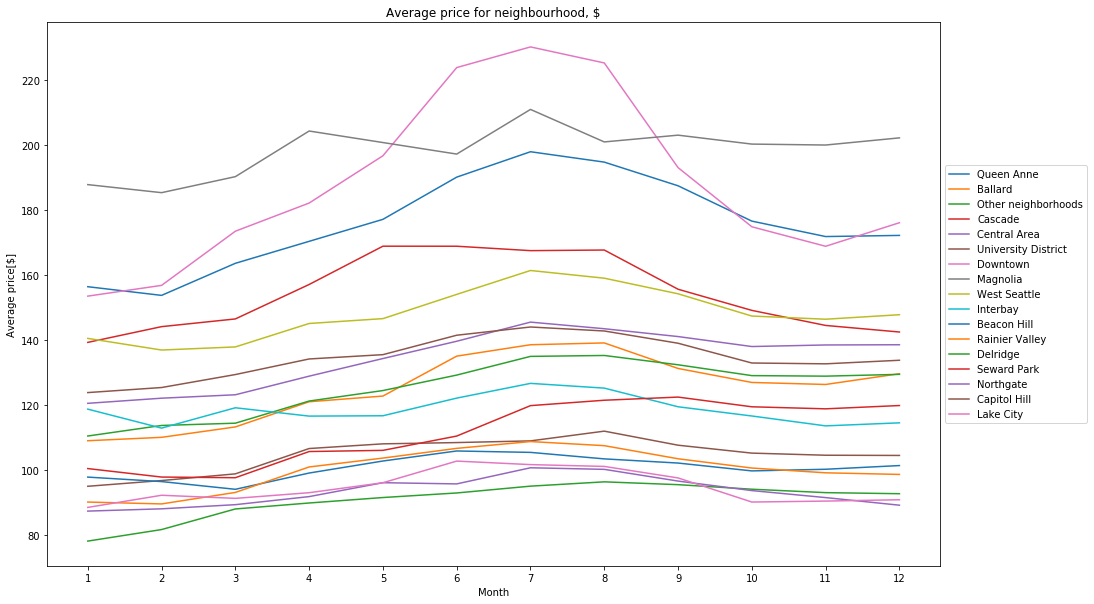

In [61]:
#get list of neighbourhoods
neighbourhoods = df['neighbourhood_group_cleansed'].unique()

#get prices by month and neighbourhood
price_by_month_neighbourhood = df.groupby(['month','neighbourhood_group_cleansed']).mean().reset_index()

#plot prices for each neighbourhood
fig = plt.figure(figsize=(20,10))
ax = plt.subplot(111)

for neighbourhood in neighbourhoods:
    ax.plot(price_by_month_neighbourhood[price_by_month_neighbourhood['neighbourhood_group_cleansed'] == neighbourhood]['month'],
             price_by_month_neighbourhood[price_by_month_neighbourhood['neighbourhood_group_cleansed'] == neighbourhood]['price'],
             label = neighbourhood)
    
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.ylabel('Average price[$]')
plt.xlabel('Month')
plt.xticks(np.arange(1, 13, step=1))
plt.title('Average price for neighbourhood, $')
plt.savefig('./vizualizations/average price for neighbourhood.png')
plt.show()

> We can see that ***prices differ depending on the location*** (neighbourhood). The **highest average prices** are in ***`Downtown`***. But for each neighbourhood prices tend to raise in summer as we saw this earlier too.

##### ***How many listings are present for each accommodates type?***

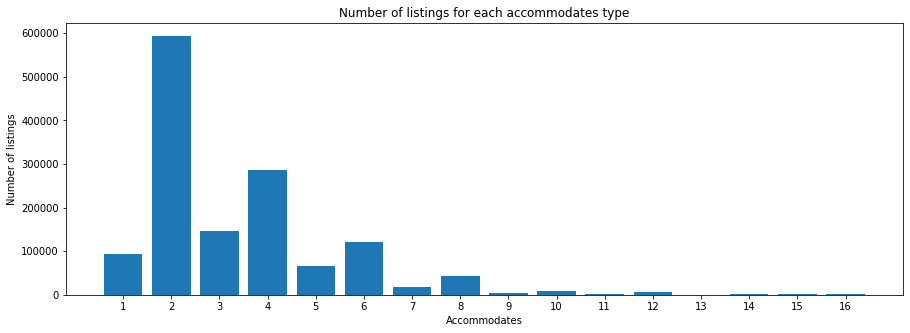

In [62]:
#get total number of listings for each accommodates type(number of accommodations)
num_listing_accommodates = [len(df.groupby(['accommodates']).get_group(i)['listing_id']) for i in sorted(df['accommodates'].unique())]
plt.figure(figsize=(15,5))
plt.bar(sorted(df['accommodates'].unique()), num_listing_accommodates)   #color=np.random.rand(12,3)
plt.xticks(range(1,sorted(df['accommodates'].unique())[-1]+1))
plt.title('Number of listings for each accommodates type')
plt.xlabel('Accommodates')
plt.ylabel('Number of listings')
plt.savefig('./vizualizations/Number of listings for each accommodates type.png')
plt.show()

> We can see that there are **maximum number of listings for `2 occommodates`**.

##### ***What is the average price for each accommodates type***?

In [63]:
#now let's see how is the price changing according to the acoommodation type
grouped_accommodate_mean_price = df.groupby(['accommodates'])['price'].mean()
average_price_per_accommodate = [grouped_accommodate_mean_price[i] for i in sorted(df['accommodates'].unique())]

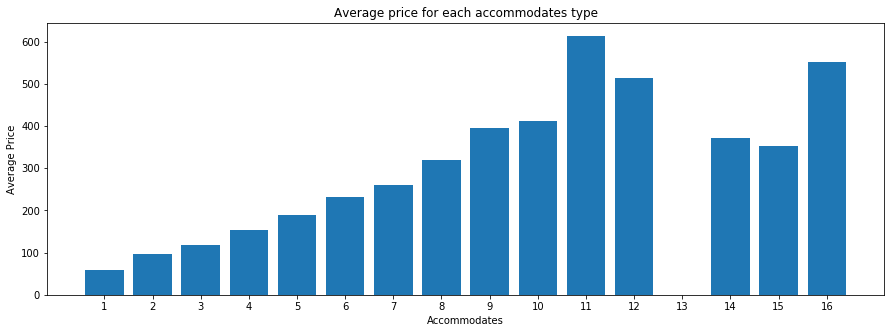

In [64]:
plt.figure(figsize=(15,5))
plt.bar(sorted(df['accommodates'].unique()), average_price_per_accommodate)   #color=np.random.rand(12,3)
plt.xticks(range(1,sorted(df['accommodates'].unique())[-1]+1))
plt.title('Average price for each accommodates type')
plt.xlabel('Accommodates')
plt.ylabel('Average Price')
plt.savefig('./vizualizations/Average price for each accommodates type.png')
plt.show()

> Now here we can see that as the ***number of accommodates increase the price also raise***. This is quite evident that greater the number of accommodates the price of property should be greater. And this also hints in being a ***`great influential feature`*** for ***predicting price***.

#### ***Occupancy rate***
##### ***What is the `occupancy rate over the time` of year?***

In [65]:
# convert 'date' column to pandas timestamps
calendar_seattle['date'] = pd.to_datetime(calendar_seattle['date'])

In [68]:
#occupancy rate over time. Number of listings booked per day
grouped_date = calendar_seattle.groupby(['date'])
occupancy_rate = []
for x in calendar_seattle['date'].unique():
    calendar_seattle_tmp = grouped_date.get_group(pd.Timestamp(x))
    occupancy_rate.append(len(calendar_seattle_tmp[calendar_seattle_tmp['available'] == 'f']) / len(calendar_seattle_tmp))

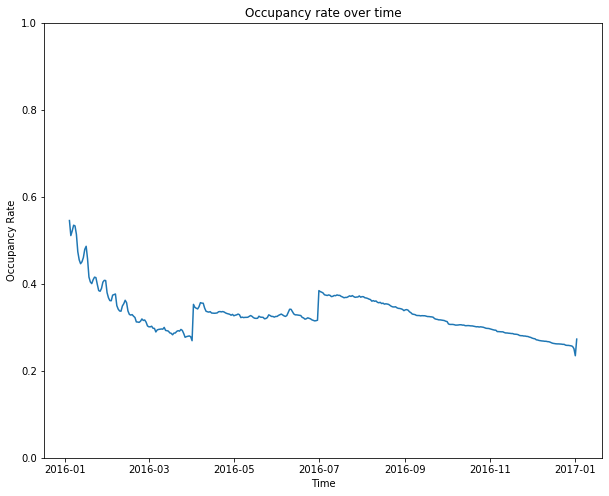

In [69]:
#occupancy rate over time
plt.figure(figsize=(10,8))
plt.plot_date(calendar_seattle['date'].unique(), occupancy_rate, linestyle='solid', marker='None');
plt.ylim(0,1)
plt.title('Occupancy rate over time')
plt.xlabel('Time')
plt.ylabel('Occupancy Rate')
plt.savefig('./vizualizations/occupancy rate over time.png')
plt.show()

> We can again see that the ***occupancy rate*** is ***`high in summer and winter`*** (during New Year). This once again proves that summer and winter are the ***`busiest times`*** for **`vacations in seattle`**.

### Overview of `reviews.csv`

#### Count ***`number of reviews posted for the listings in past years`***, and what out the ***`trend of number of reviews`*** and whether this could be a factor that affects price.
##### ***What are the number of reviews added over time in `reviews.csv`?***

In [70]:
# read dataframe
reviews_df = pd.read_csv('reviews_seattle.csv')
reviews_df['date'] = pd.to_datetime(reviews_df['date'])

In [71]:
#Number of reviews over the past few years
grouped_reviews_date = reviews_df.groupby(['date'])
num_reviews = [len(grouped_reviews_date.get_group(pd.Timestamp(x))) for x in reviews_df['date'].unique()]

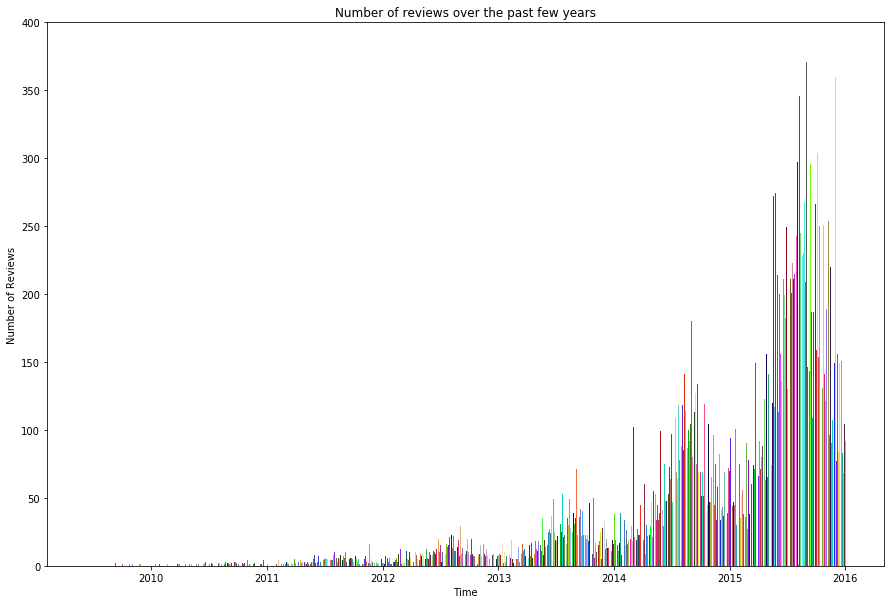

In [72]:
plt.figure(figsize=(15,10))
plt.bar(list(reviews_df['date'].unique()), num_reviews, color=np.random.rand(len(list(reviews_df['date'].unique())),3));
plt.ylim(0,400)
plt.title('Number of reviews over the past few years')
plt.xlabel('Time')
plt.ylabel('Number of Reviews')
plt.savefig('./vizualizations/number_of_reviews_overtime.png')
plt.show()

> This can be easily seen that the number of reviews have been ***`exponentially increased`*** from 2013 and are the highest in 2016.

## **Modelling**

`Data modeling` for `price predictions` and get `important features` that influence the price most 

In [73]:
#remove rows where price_x == nan, because price will be used as response column
df = df.dropna(subset=['price'])

#turn categorical columns into dummies
cat_columns = list(df.select_dtypes(include=['object']).columns)
    
for col in  cat_columns:
    df = pd.concat([df.drop(col, axis=1), pd.get_dummies(df[col], prefix=col, prefix_sep='_',drop_first=True, dummy_na=True)], axis=1)
#drop listing_id and year columns
df = df.drop(columns = ['listing_id', 'year'])

##### ***Confirm wheather all columns are numeric or not***

In [74]:
numeric_dtypes = ['int64','float64', 'int32', 'float32', 'uint8']
for col in df.columns:
    if df[col].dtypes not in numeric_dtypes:
        print(f'{col} is not numeric')
        print("All the columns are not numeric, can't fit any model on this data. Change the data to all numeric values")
        break

In [75]:
#final dataframe overview before modelling
df.head()

,host_listings_count,accommodates,bathrooms,bedrooms,beds,guests_included,minimum_nights,maximum_nights,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,price,month,host_response_rate_buckets,amenities_Wireless Internet,amenities_Heating,amenities_Kitchen,amenities_Smoke Detector,amenities_Essentials,amenities_Dryer,amenities_Washer,amenities_Internet,amenities_Shampoo,amenities_TV,host_verifications_email,host_verifications_ phone,host_verifications_ reviews,host_verifications_ facebook,host_verifications_ jumio,host_verifications_ kba,host_verifications_ linkedin,host_verifications_ google,host_verifications_ manual_offline,host_verifications_phone,extra_people_fee,available_nan,host_response_time_within a day,host_response_time_within a few hours,host_response_time_within an hour,host_response_time_nan,host_is_superhost_t,host_is_superhost_nan,host_has_profile_pic_t,host_has_profile_pic_nan,host_identity_verified_t,host_identity_verified_nan,neighbourhood_group_cleansed_Beacon Hill,neighbourhood_group_cleansed_Capitol Hill,neighbourhood_group_cleansed_Cascade,neighbourhood_group_cleansed_Central Area,neighbourhood_group_cleansed_Delridge,neighbourhood_group_cleansed_Downtown,neighbourhood_group_cleansed_Interbay,neighbourhood_group_cleansed_Lake City,neighbourhood_group_cleansed_Magnolia,neighbourhood_group_cleansed_Northgate,neighbourhood_group_cleansed_Other neighborhoods,neighbourhood_group_cleansed_Queen Anne,neighbourhood_group_cleansed_Rainier Valley,neighbourhood_group_cleansed_Seward Park,neighbourhood_group_cleansed_University District,neighbourhood_group_cleansed_West Seattle,neighbourhood_group_cleansed_nan,property_type_Bed & Breakfast,property_type_Boat,property_type_Bungalow,property_type_Cabin,property_type_Camper/RV,property_type_Chalet,property_type_Condominium,property_type_Dorm,property_type_House,property_type_Loft,property_type_Other,property_type_Tent,property_type_Townhouse,property_type_Treehouse,property_type_Yurt,property_type_nan,room_type_Private room,room_type_Shared room,room_type_nan,bed_type_Couch,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed,bed_type_nan,instant_bookable_t,instant_bookable_nan,cancellation_policy_moderate,cancellation_policy_strict,cancellation_policy_nan,require_guest_profile_picture_t,require_guest_profile_picture_nan,require_guest_phone_verification_t,require_guest_phone_verification_nan
0,3.0,4,1.0,1.0,1.0,2,1,365,207,95.0,10.0,10.0,10.0,10.0,9.0,10.0,2,85.0,1,1,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
1,3.0,4,1.0,1.0,1.0,2,1,365,207,95.0,10.0,10.0,10.0,10.0,9.0,10.0,2,85.0,1,1,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
9,3.0,4,1.0,1.0,1.0,2,1,365,207,95.0,10.0,10.0,10.0,10.0,9.0,10.0,2,85.0,1,1,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
10,3.0,4,1.0,1.0,1.0,2,1,365,207,95.0,10.0,10.0,10.0,10.0,9.0,10.0,2,85.0,1,1,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
14,3.0,4,1.0,1.0,1.0,2,1,365,207,95.0,10.0,10.0,10.0,10.0,9.0,10.0,2,85.0,1,1,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0


In [76]:
#check if there are any missing values
df.isnull().sum().max()

0

In [77]:
#prepare train and test datasets for modelling
X = df.drop(columns = 'price')
y = df[['price']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

##### ***Fitting a Random Forest Model***

In [79]:
#train RF regressor model
forest = RandomForestRegressor(n_estimators=100, 
                               criterion='mse', 
                               random_state=42, 
                               n_jobs=-1,verbose=1)
forest.fit(X_train, y_train.squeeze())

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  9.4min finished


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=False,
                      random_state=42, verbose=1, warm_start=False)

##### ***Store the model as pickle file***

In [80]:
#store the model
import pickle
with open('model.pkl', 'wb') as fid:
    pickle.dump(forest, fid) 

## **Evaluation** (not on new data, this is based on 30% of the original data, validation/test data that we processed)

In [81]:
#calculate scores for the model
y_train_preds = forest.predict(X_train)
y_test_preds = forest.predict(X_test)

print('Random Forest MSE train: %.3f, test: %.3f' % (
        mean_squared_error(y_train, y_train_preds),
        mean_squared_error(y_test, y_test_preds)))
print('Random Forest R^2 train: %.3f, test: %.3f' % (
        r2_score(y_train, y_train_preds),
        r2_score(y_test, y_test_preds)))

[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.7s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    5.3s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.7s


Random Forest MSE train: 186.944, test: 211.258
Random Forest R^2 train: 0.983, test: 0.981


[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    2.1s finished


##### ***Get feature importance***

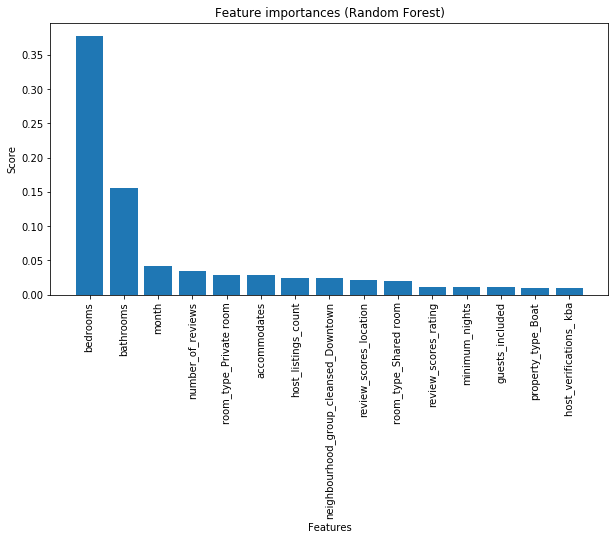

In [82]:
#get feature importances from the model
headers = ["name", "score"]
values = sorted(zip(X_train.columns, forest.feature_importances_), key=lambda x: x[1] * -1)
forest_feature_importances = pd.DataFrame(values, columns = headers)
forest_feature_importances = forest_feature_importances.sort_values(by = ['score'], ascending = False)

features = forest_feature_importances['name'][:15]
y_pos = np.arange(len(features))
scores = forest_feature_importances['score'][:15]

#plot feature importances
plt.figure(figsize=(10,5))
plt.bar(y_pos, scores, align='center')
plt.xticks(y_pos, features, rotation='vertical')
plt.ylabel('Score')
plt.xlabel('Features')
plt.title('Feature importances (Random Forest)')
plt.savefig('./vizualizations/feature importances.png')
plt.show()

> The above given bar chart shows the `top 15 features` that are most influential towards price. <br>
***`Number of bedrooms`*** is the *most important feature* for predicting price!

## Conclusion

All the business questions are answered with appropriate numbers and reasons,<br>
Also a Random Forest regressor is fit on the data to get price as the dependent variable.